## Addressing the Earth's Surface using Discrete Global Grid Systems.

In this notebook we will explore Discrete Global Grid Systems as a base for addressing the surface of the Earth. This differs substantially from cartesian coordinates in several significant ways.

1. DGGS cells are addressed using a single string as opposed to coordinate pairs
2. The cells used for this purpose are triangular in shape, not square.
3. Cells are equal area and not subject to distortion created by cartesian coordinate systems on a spherical surface. 

### Concept

The initial concept behind this addressing system uses equilateral triangles. Lets create one now.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch

import sys
sys.path.append(r'/mnt/c/github.com/data-navigator/dggs-package/DGGS/shapes')
import triangle

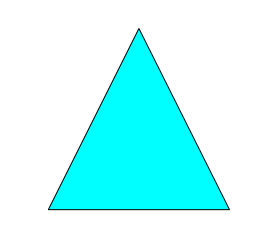

In [11]:
t = triangle.Triangle('A')
t.vertices = [(0,0),(0.5,1),(1,0),(0,0)]


fig0 = plt.figure() 
ax0 = fig0.add_subplot(111, aspect='equal') 
path = Path(list(t.vertices))
patch = PathPatch(path, facecolor='cyan')
ax0.add_patch(patch) 
ax0.set_xlim((-0.1,1.1)) 
ax0.set_ylim((-0.1,1.1)) 
plt.axis('off')
plt.show()

We can tessellate the triangle to form the net of an icosahedron.

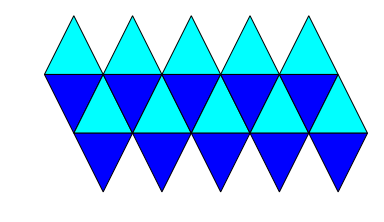

In [12]:
fig1 = plt.figure() 
ax1 = fig1.add_subplot(111, aspect='equal') 
t1 = Path([[0,0],[0.5,1],[1,0],[0,0]])
t2 = Path([[0,0],[0.5,-1],[1,0],[0,0]])
t3 = Path([[0.5,-1],[1.5,-1],[1,0],[0.5,-1]])
t4 = Path([[0.5,-1],[1,-2],[1.5,-1],[0.5,-1]])
patch1 = PathPatch(t1, facecolor='cyan')
patch2 = PathPatch(t2, facecolor='blue')
patch3 = PathPatch(t3, facecolor='cyan')
patch4 = PathPatch(t4, facecolor='blue')
ax1.add_patch(patch1) 
ax1.add_patch(patch2)
ax1.add_patch(patch3)
ax1.add_patch(patch4)

t5 = Path([[1,0],[1.5,1],[2,0],[1,0]])
t6 = Path([[1,0],[1.5,-1],[2,0],[1,0]])
t7 = Path([[1.5,-1],[2.5,-1],[2,0],[1.5,-1]])
t8 = Path([[1.5,-1],[2,-2],[2.5,-1],[1.5,-1]])
patch5 = PathPatch(t5, facecolor='cyan')
patch6 = PathPatch(t6, facecolor='blue')
patch7 = PathPatch(t7, facecolor='cyan')
patch8 = PathPatch(t8, facecolor='blue')
ax1.add_patch(patch5)
ax1.add_patch(patch6)
ax1.add_patch(patch7)
ax1.add_patch(patch8)

t9 = Path([[2,0],[2.5,1],[3,0],[2,0]])
t10 = Path([[2,0],[2.5,-1],[3,0],[2,0]])
t11 = Path([[2.5,-1],[3.5,-1],[3,0],[2.5,-1]])
t12 = Path([[2.5,-1],[3,-2],[3.5,-1],[2.5,-1]])
patch9 = PathPatch(t9, facecolor='cyan')
patch10 = PathPatch(t10, facecolor='blue')
patch11 = PathPatch(t11, facecolor='cyan')
patch12 = PathPatch(t12, facecolor='blue')
ax1.add_patch(patch9)
ax1.add_patch(patch10)
ax1.add_patch(patch11)
ax1.add_patch(patch12)

t13 = Path([[3,0],[3.5,1],[4,0],[3,0]])
t14 = Path([[3,0],[3.5,-1],[4,0],[3,0]])
t15 = Path([[3.5,-1],[4.5,-1],[4,0],[3.5,-1]])
t16 = Path([[3.5,-1],[4,-2],[4.5,-1],[3.5,-1]])
patch13 = PathPatch(t13, facecolor='cyan')
patch14 = PathPatch(t14, facecolor='blue')
patch15 = PathPatch(t15, facecolor='cyan')
patch16 = PathPatch(t16, facecolor='blue')
ax1.add_patch(patch13)
ax1.add_patch(patch14)
ax1.add_patch(patch15)
ax1.add_patch(patch16)

t17 = Path([[4,0],[4.5,1],[5,0],[4,0]])
t18 = Path([[4,0],[4.5,-1],[5,0],[4,0]])
t19 = Path([[4.5,-1],[5.5,-1],[5,0],[4.5,-1]])
t20 = Path([[4.5,-1],[5,-2],[5.5,-1],[4.5,-1]])
patch17 = PathPatch(t17, facecolor='cyan')
patch18 = PathPatch(t18, facecolor='blue')
patch19 = PathPatch(t19, facecolor='cyan')
patch20 = PathPatch(t20, facecolor='blue')
ax1.add_patch(patch17)
ax1.add_patch(patch18)
ax1.add_patch(patch19)
ax1.add_patch(patch20)

ax1.set_xlim((-0.1,5.6)) 
ax1.set_ylim((-2.1,1.1)) 
plt.axis('off')
plt.show()

We now have twenty triangles, equal to the number of faces on an Icosahedron. Each triangle can be equally subdivided into multiple smaller triangles. This forms the basis of the addressing grid.

In [4]:
y = t.tessellate_class_one()

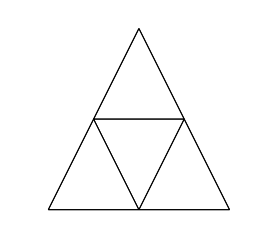

In [13]:
fig2 = plt.figure() 
ax2 = fig2.add_subplot(111, aspect='equal') 
path = Path(list(t.vertices))
patch = PathPatch(path, facecolor='none')
ax2.add_patch(patch) 

for _ in t.tessellate_class_one():
    path = Path(_.vertices)
    patch = PathPatch(path, facecolor='none')
    ax2.add_patch(patch) 

ax2.set_xlim((-0.1,1.1)) 
ax2.set_ylim((-0.1,1.1)) 

plt.axis('off')
plt.show()

This forms the basis of the concept of a Discrete Global Grid System of addressed cells. The initial 20 triangles, folded into an Icosahedron can be projected to the surface of the earth and given an ID. Each Cell can then subdivide, giving each SubCell an ID by appending a second ID number/letter to the string. This can continue indefinitely, leading to many triangles within triangles that will continuously refine into a higher resolution grid of addresses. 

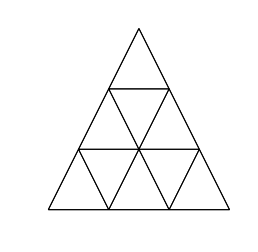

In [15]:
tess_class_two = t.tessellate_class_two()

fig3 = plt.figure() 
ax3 = fig3.add_subplot(111, aspect='equal') 
path = Path(list(t.vertices))
patch = PathPatch(path, facecolor='none')
ax3.add_patch(patch) 

for _ in tess_class_two:
    path = Path(_.vertices)
    patch = PathPatch(path, facecolor='none')
    ax3.add_patch(patch) 

ax3.set_xlim((-0.1,1.1)) 
ax3.set_ylim((-0.1,1.1)) 

plt.axis('off')
plt.show()

In [7]:
from IPython.display import display, Math, Latex

display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

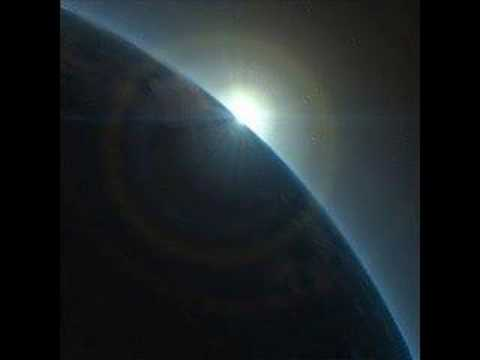

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("p86BPM1GV8M")